In [1]:
from mazelib import *
import numpy as np
import matplotlib.pyplot as plt
from functions import *

#### Problem definition
    
    Inputs:
        - Maze start and end points
        - Maze (drivable non drivable area) /  not necessary as long the supervision exist
        - Mazes should be generated by difficulty and should be unique
        
    Outputs:
        - x, y future coordinates of the agent (one move)
        - The number of moves to solve the maze is variable
        - A grid is generated using the predicted coordinates and the agent size
    
    Losses:
        - Imitation Loss, RMSE
        - Path planning loss, overlap between predicted ego and desired path planning
        - Maze loss, overlap between predicted ego and maze walls (do not hit or traverse)
        - Start/ end loss: overlap of the FIRST and LAST sequence points with the maze's entrance and exit
        
    Notes:
        - We study the effect of dopping (%) on non-valid trajectories on the agent's behavior
        
        
### Generate inputs

#### 1) Generate mazes and solutions by size (small, medium, large)

In [2]:
# List of maze sizes
# The bigger the harder
small = [(3,3), (4,4)]    # upsampling factor 3
medium = [(5,5), (6,6)]   # upsampling factor 2
large = [(7,7), (8,8)]    # upsampling factor 1.5


#### Maze:

In [3]:
maze = generate_mazes(medium[1], 1, 10)

In [4]:
grid = clear_maze_entrances(maze[0]['grid'], maze[0]['start'], maze[0]['end'])
grid = resize_grid(grid['grid'], (64,64))

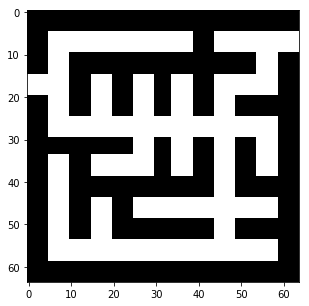

In [5]:
showPNG(grid, axis=True)

#### Path planning:

In [6]:
path = generate_path_planning(maze[0]['grid'], maze[0]['start'], maze[0]['end'], maze[0]['solutions'])
path = resize_grid(path['grid'], (64,64))

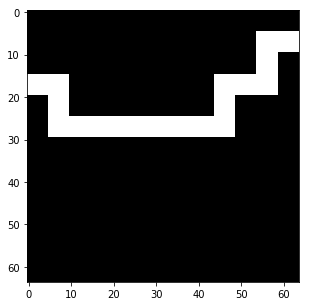

In [7]:
showPNG(path, axis=True)

#### Entrances:

In [8]:
entrances = generate_entrances(maze[0]['grid'], maze[0]['start'], maze[0]['end'])
entrances = resize_grid(entrances['grid'], (64,64))

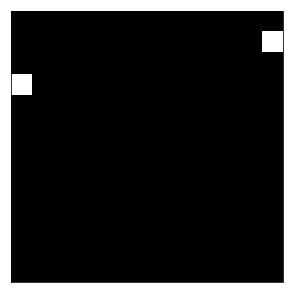

In [9]:
showPNG(entrances, axis=False)

#### Ego pose:

In [10]:
ego_polygon = polygon_from_ego((30,30), angle=0, l=3, w=1)

In [11]:
egopose = draw_egopose(resize_grid(maze[0]['grid']), ego_polygon)

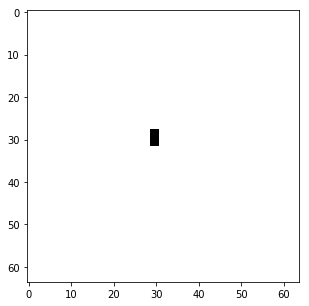

In [12]:
showPNG(egopose, axis=True)

#### Imitation:

In [13]:
solution = get_solution(maze[0]['solutions'], maze[0]['start'], maze[0]['end'])

In [14]:
up = upsample_trajectory(solution, (64,64), maze[0]['grid'].shape)

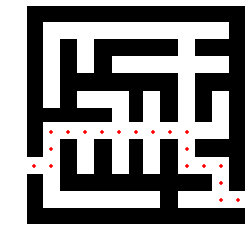

In [15]:
plot_solution(grid, up)

### Trajectory pertubations
#### Estimate road width

In [16]:
print("The estimated road width in pixels is =", estimate_road_width(path))
road_size = estimate_road_width(path)

The estimated road width in pixels is = 4


In [17]:
family_trajectories = generate_family_trajectories(up, 100, road_size)

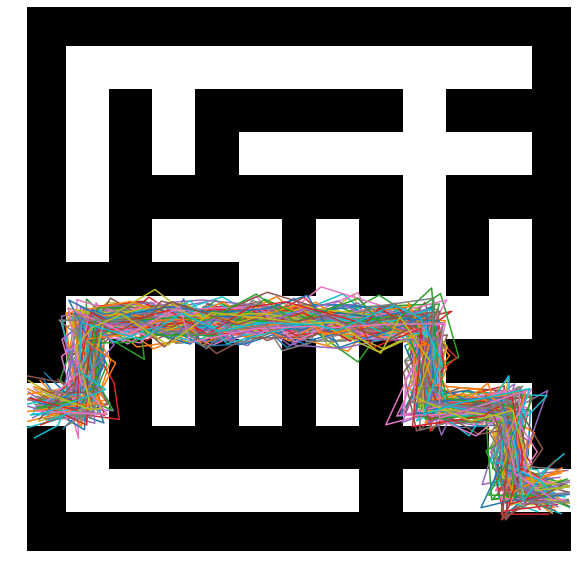

In [18]:
plot_trajectories(grid, family_trajectories)